In [32]:
import pandas as pd
import numpy as np


In [33]:
df=pd.read_csv("first inten project.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [34]:
df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [35]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [36]:
#drop non important column
df.drop(['Booking_ID'], axis=1, inplace=True)

In [37]:
#format the date column
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df = df.dropna(subset=['date of reservation'])

#extract year and month from date of reservation column
df['booking_year'] = df['date of reservation'].dt.year
df['booking_month'] = df['date of reservation'].dt.month

#drop date of reservation column
df.drop(['date of reservation'], axis=1, inplace=True)

C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\3166518933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_year'] = df['date of reservation'].dt.year
C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\3166518933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_month'] = df['date of reservation'].dt.month
C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\3166518933.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [38]:
#find numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['number of adults',
 'number of children',
 'number of weekend nights',
 'number of week nights',
 'car parking space',
 'lead time',
 'repeated',
 'P-C',
 'P-not-C',
 'average price ',
 'special requests',
 'booking_year',
 'booking_month']

Boxplot BEFORE IQR capping


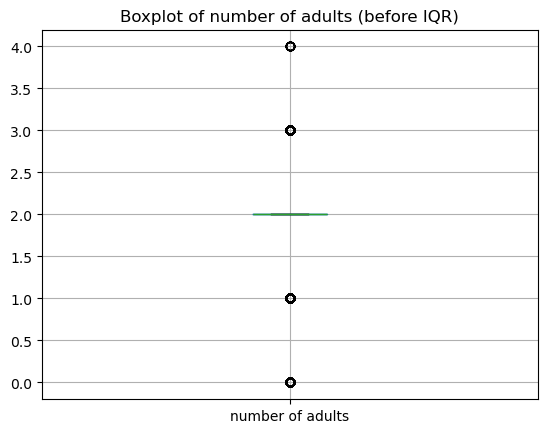

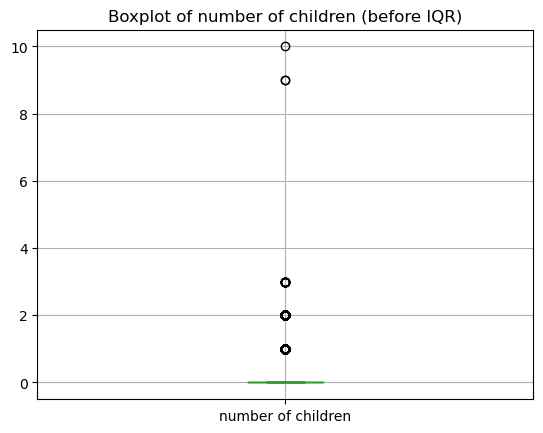

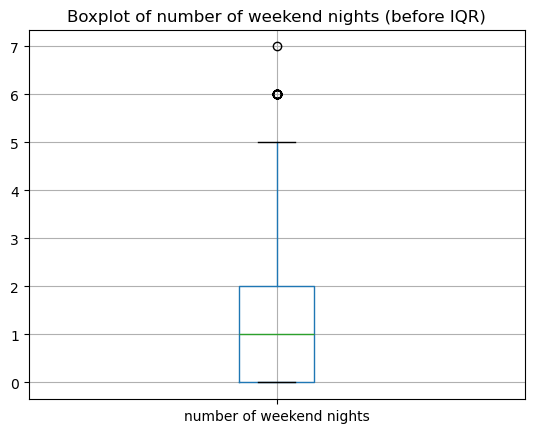

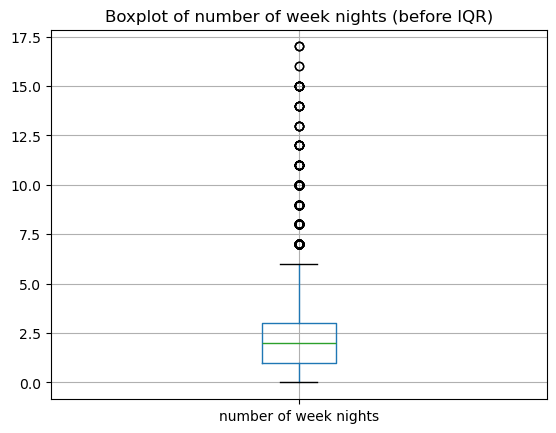

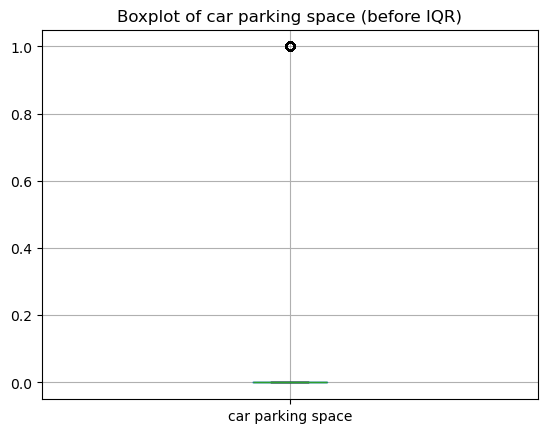

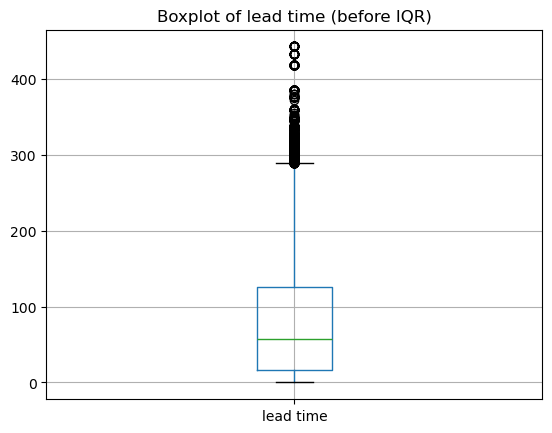

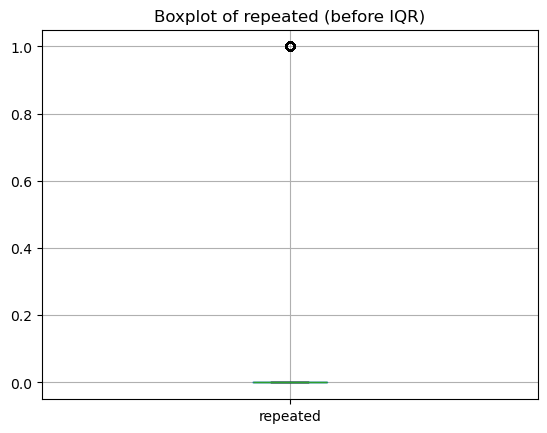

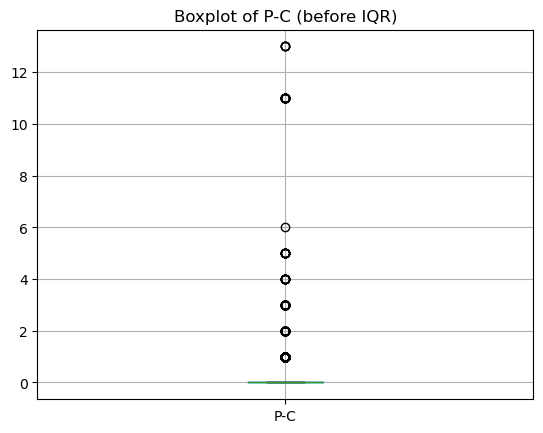

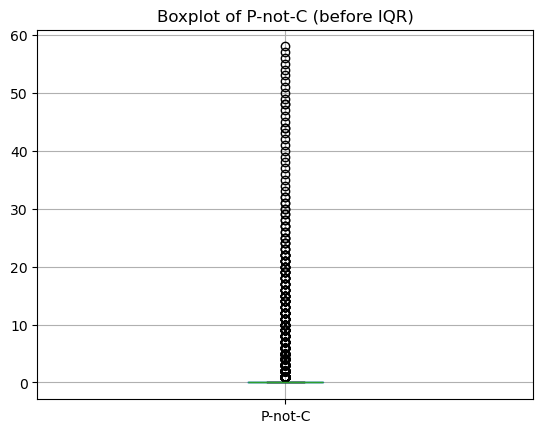

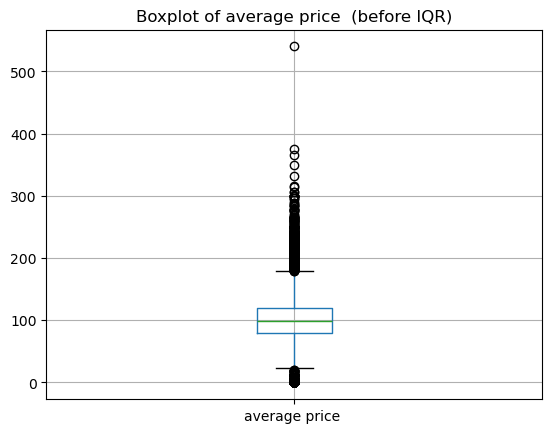

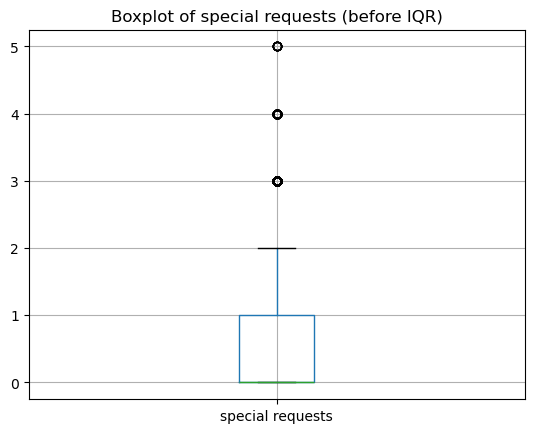

In [39]:
outlier_cols = [col for col in num_cols if col not in ['booking_year', 'booking_month', 'booking status']]

import matplotlib.pyplot as plt
print("Boxplot BEFORE IQR capping")
for col in outlier_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col} (before IQR)')
    plt.show()


In [40]:
#Outlier detection and handling using IQR and Z-score
outlier_cols = [col for col in num_cols if col not in ['booking_year', 'booking_month', 'booking status', 'average price ']]

# IQR capping
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[:, col] = np.clip(df[col].astype(float), lower_bound, upper_bound)


  
# Z-score outlier check
from scipy.stats import zscore
for col in outlier_cols:
    z_scores = np.abs(zscore(df[col]))
    outliers = np.where(z_scores > 3)[0]
    print(f"{col}: Z-score outliers = {len(outliers)}")


number of adults: Z-score outliers = 0
number of children: Z-score outliers = 0
number of weekend nights: Z-score outliers = 184
number of week nights: Z-score outliers = 0
car parking space: Z-score outliers = 0
lead time: Z-score outliers = 0
repeated: Z-score outliers = 0
P-C: Z-score outliers = 0
P-not-C: Z-score outliers = 0
special requests: Z-score outliers = 0


C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\304446029.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[224.   5.   1. ...  83. 121.  44.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = np.clip(df[col].astype(float), lower_bound, upper_bound)
C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\304446029.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.  1.  0.  ... 1.  1.  2.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = np.clip(df[col].astype(float), lower_bound, upper_bound)


In [41]:
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,booking_year,booking_month
0,2,0,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,Not_Canceled,2015,10
1,2,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,Not_Canceled,2018,11
2,2,0,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,Canceled,2018,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,Canceled,2017,5
4,2,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,Canceled,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,289.5,Online,0,0,0,115.00,1.0,Canceled,2018,9
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34.0,Online,0,0,0,107.55,1.0,Not_Canceled,2017,10
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83.0,Online,0,0,0,105.61,1.0,Not_Canceled,2018,12
36283,2,0,0,4,Meal Plan 1,0,Room_Type 1,121.0,Offline,0,0,0,96.90,1.0,Not_Canceled,2018,7


Boxplot AFTER IQR capping


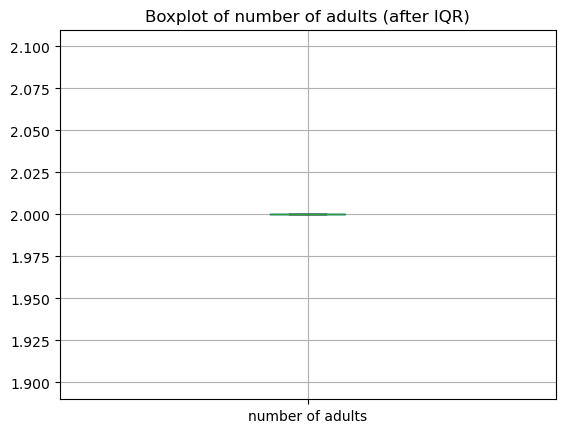

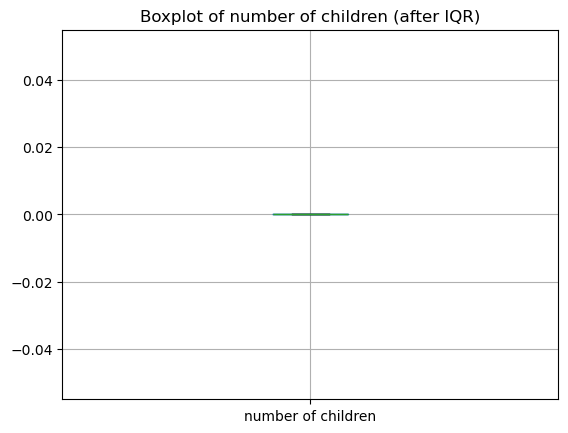

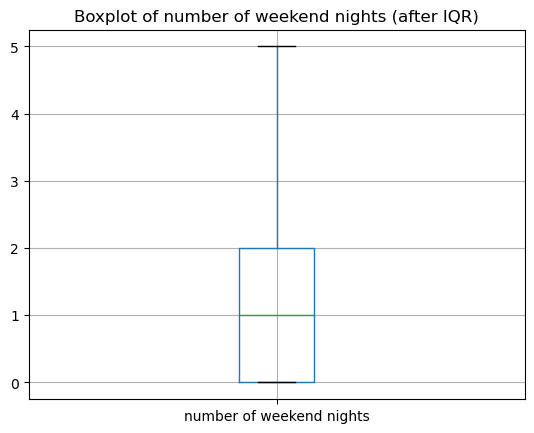

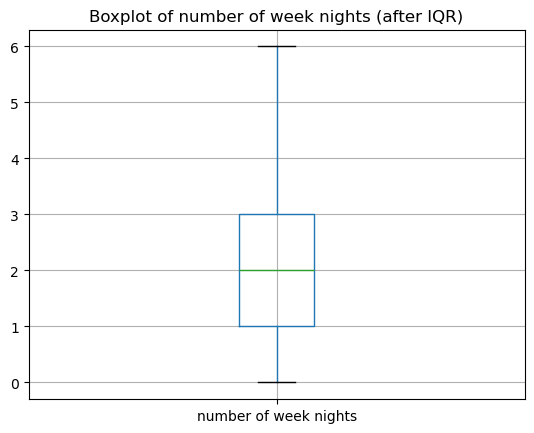

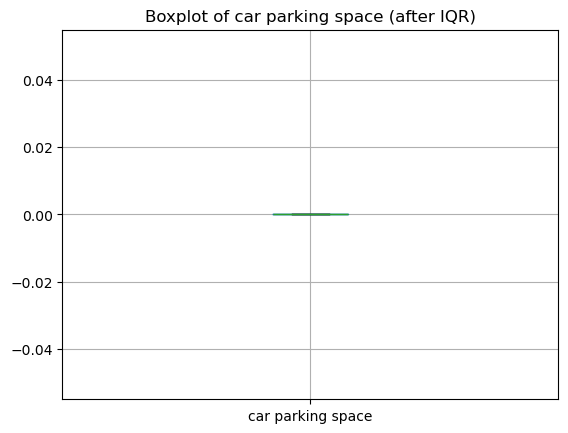

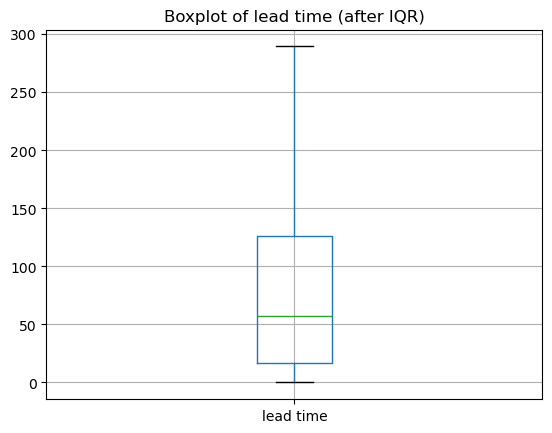

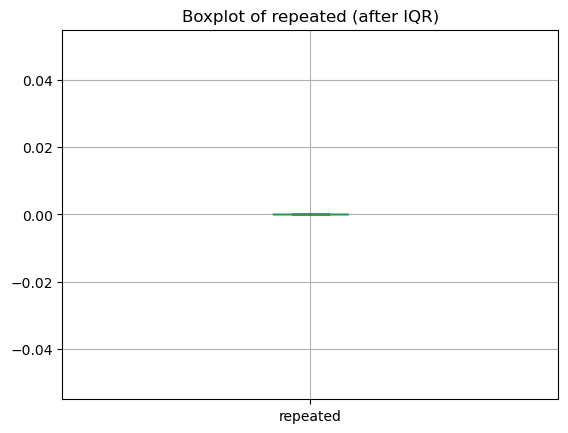

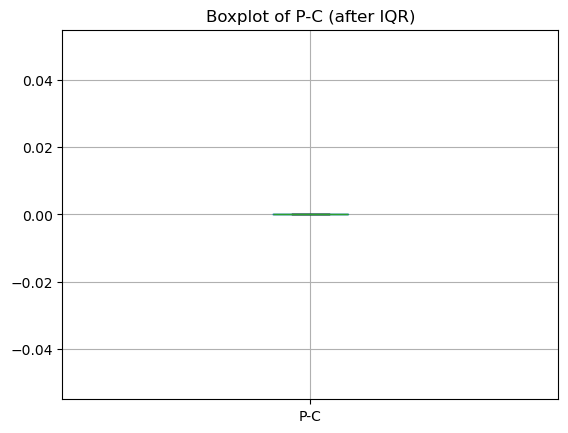

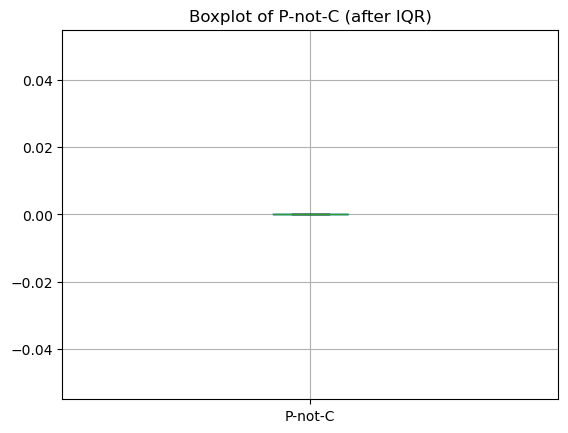

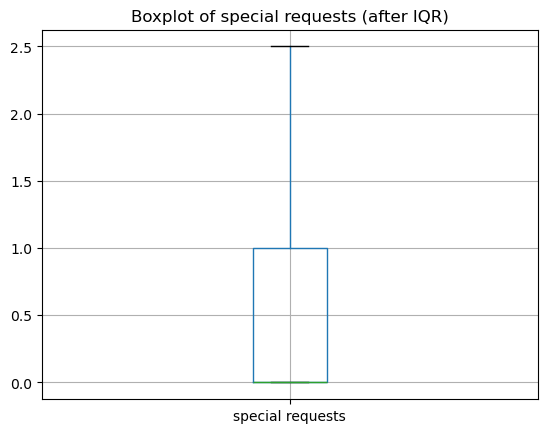

In [42]:
print("Boxplot AFTER IQR capping")
for col in outlier_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col} (after IQR)')
    plt.show()


In [43]:
#feature engineering (feature transformation) using log transformation
#make log transformation without target column and date columns because its not continuous data and not have outliers
#log transformation Applied to numeric data only
#log transformation using for reduce skewness and high variance

target_col = 'booking status'
log_cols = [col for col in num_cols if col not in ['booking_year', 'booking_month', target_col]]

#cheak for negative values because the log not work in negative value
log1p_cols = ['P-C', 'P-not-C', 'average price ', 'lead time','number of week nights', 'number of weekend nights', 'special requests']
for col in log1p_cols:
    if col in df.columns:
        if (df[col] < -1).any():
            print(f"Column '{col}' contains values <= -1. Skipping log1p.")
        else:
            df.loc[:, col] = np.log1p(df[col])


C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\2758515889.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.79175947 1.38629436 1.38629436 ... 1.38629436 1.60943791 1.79175947]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = np.log1p(df[col])
C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\2758515889.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.09861229 0.69314718 0.69314718 ... 0.69314718 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = np.log1p(df[col])


In [44]:
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,booking_year,booking_month
0,2,0,1.098612,1.791759,Meal Plan 1,0,Room_Type 1,5.416100,Offline,0,0,0,4.488636,0.000000,Not_Canceled,2015,10
1,2,0,0.693147,1.386294,Not Selected,0,Room_Type 1,1.791759,Online,0,0,0,4.679164,0.693147,Not_Canceled,2018,11
2,2,0,0.693147,1.386294,Meal Plan 1,0,Room_Type 1,0.693147,Online,0,0,0,3.931826,0.000000,Canceled,2018,2
3,2,0,0.000000,1.098612,Meal Plan 1,0,Room_Type 1,5.356586,Online,0,0,0,4.615121,0.693147,Canceled,2017,5
4,2,0,0.693147,1.098612,Not Selected,0,Room_Type 1,3.891820,Online,0,0,0,4.356709,0.000000,Canceled,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0.000000,1.098612,Meal Plan 2,0,Room_Type 1,5.671604,Online,0,0,0,4.753590,0.693147,Canceled,2018,9
36281,2,0,0.693147,1.386294,Meal Plan 1,0,Room_Type 1,3.555348,Online,0,0,0,4.687211,0.693147,Not_Canceled,2017,10
36282,2,0,0.693147,1.386294,Meal Plan 1,0,Room_Type 4,4.430817,Online,0,0,0,4.669177,0.693147,Not_Canceled,2018,12
36283,2,0,0.000000,1.609438,Meal Plan 1,0,Room_Type 1,4.804021,Offline,0,0,0,4.583947,0.693147,Not_Canceled,2018,7


In [45]:
#transformation for the categorical datd using one hot encoding
#encoding
#if we make OneHotEncoding in the categoric data thats mean we get multicollinearity 
#must be make encoding before check multicollinearity 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
target_col = 'booking status'
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != target_col] #or using drop

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_cols), index=df.index)

#concat the encoded data to original data after drop it
df = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

#encode the target using label encoder
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])


<Axes: >

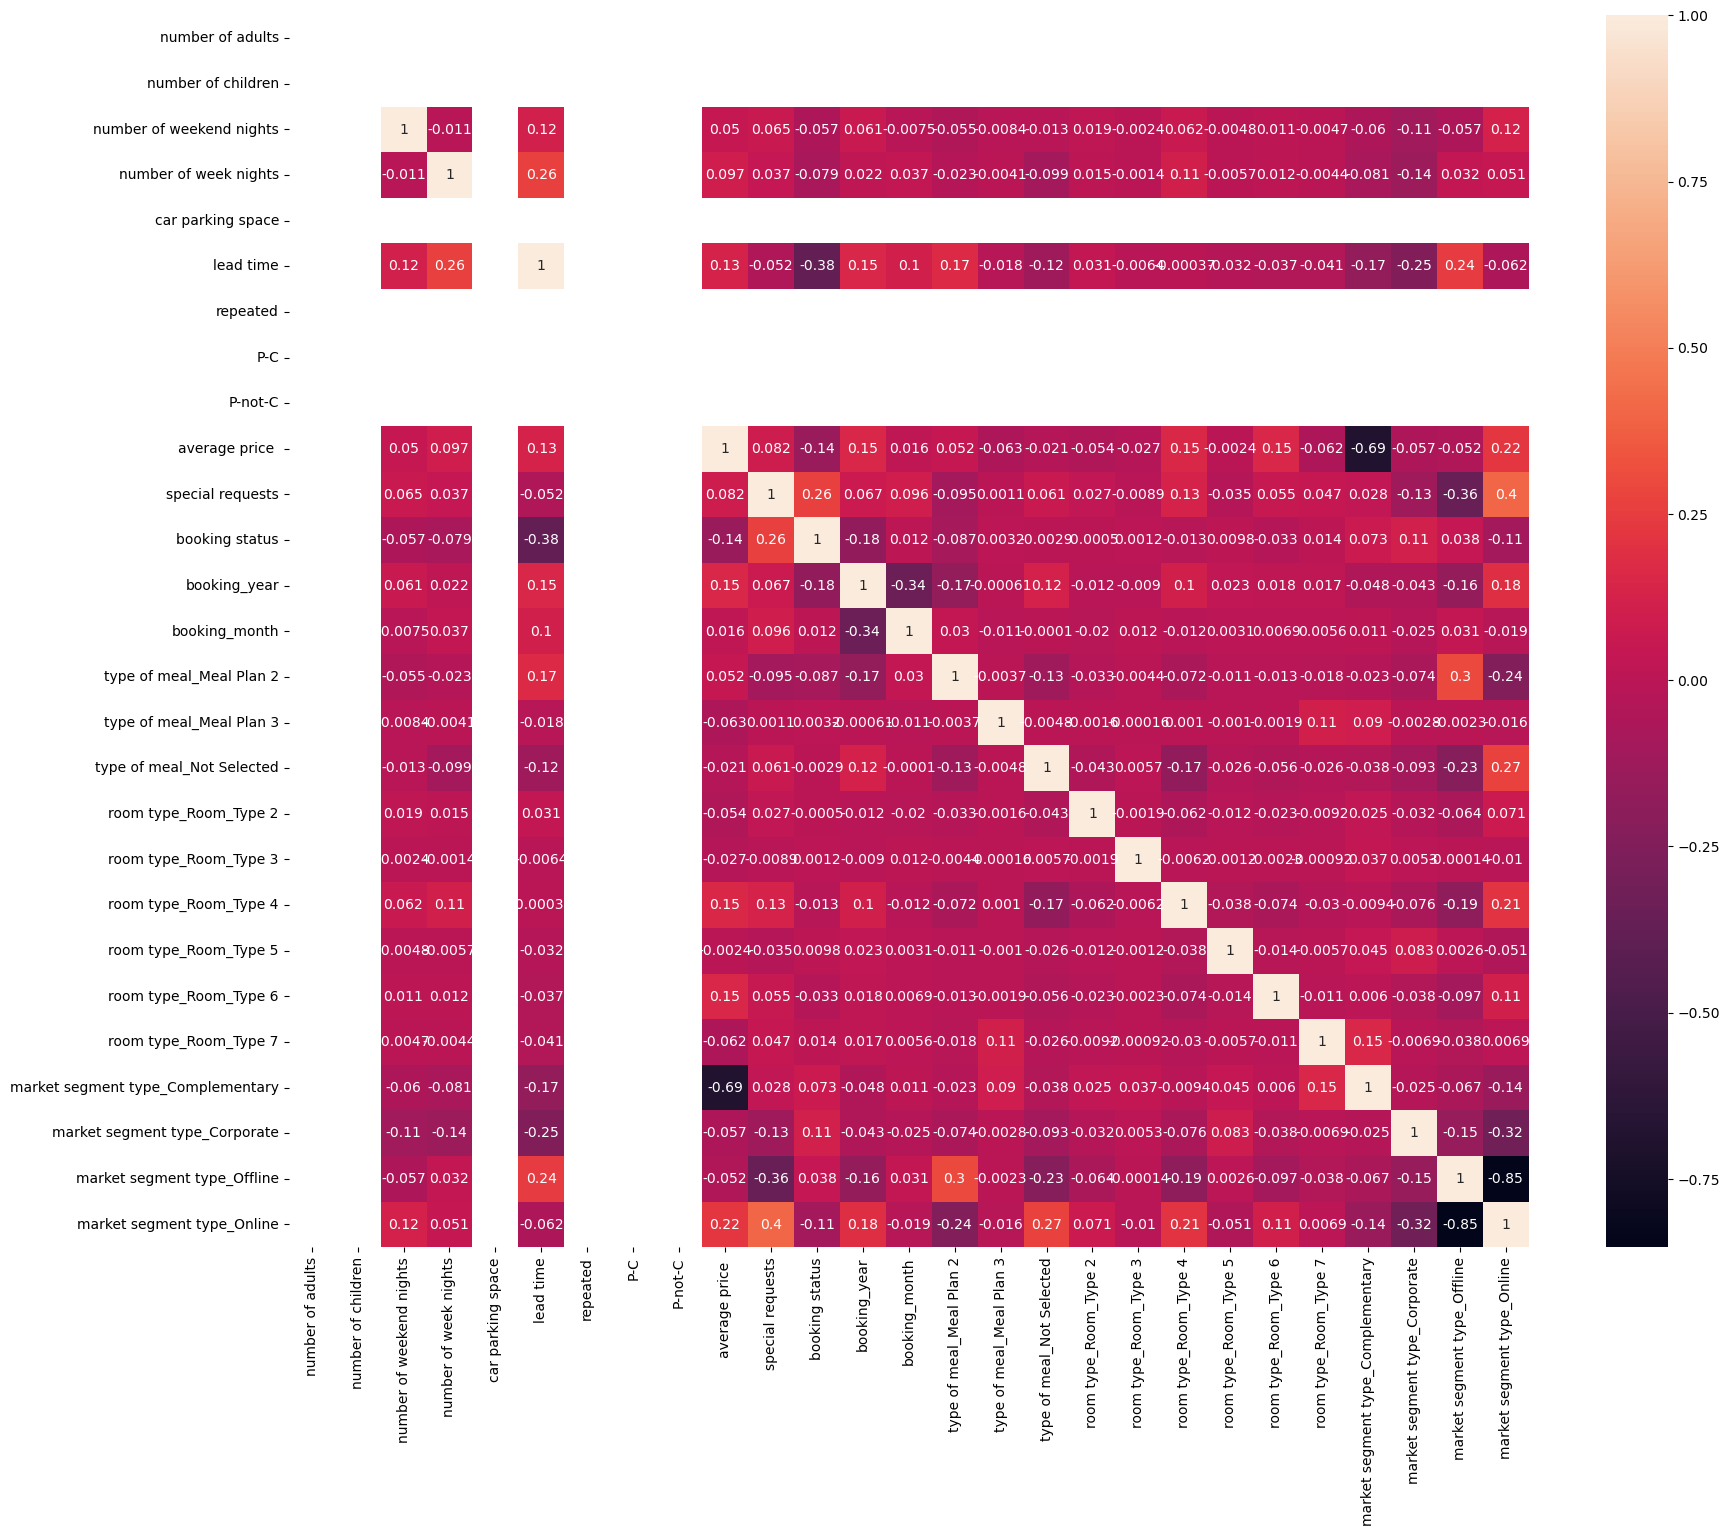

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)


In [47]:
'''
drop the columns have strong correlation

import numpy as np

# حساب مصفوفة الارتباط
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# استخراج الأعمدة التي لها ارتباط أعلى من 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Columns with high correlation to drop:", to_drop)

# حذفها من الداتا
df.drop(columns=to_drop, inplace=True)
'''

'\ndrop the columns have strong correlation\n\nimport numpy as np\n\n# حساب مصفوفة الارتباط\ncorr_matrix = df.corr().abs()\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))\n\n# استخراج الأعمدة التي لها ارتباط أعلى من 0.9\nto_drop = [column for column in upper.columns if any(upper[column] > 0.9)]\nprint("Columns with high correlation to drop:", to_drop)\n\n# حذفها من الداتا\ndf.drop(columns=to_drop, inplace=True)\n'

In [48]:
#multicollinearity handle using VIF (Variance Inflation Factor)
#claculate VIF to discover the columns have multicolinearity and drop the columns have vif>10
#we drop pc and p-not-c because have Perfect Negative Correlation ex:- pc are 0 and p-not-c are 1 in all rows

from statsmodels.stats.outliers_influence import variance_inflation_factor

cols_to_drop = ['P-C', 'P-not-C']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
log1p_cols = [col for col in log1p_cols if col not in cols_to_drop]

numeric_for_vif = [col for col in log1p_cols if col in df.columns]
if len(numeric_for_vif) > 1:
    X_temp = df[numeric_for_vif]
    vif_df = pd.DataFrame()
    vif_df["variables"] = X_temp.columns
    vif_df["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
    high_vif_cols = vif_df[vif_df['VIF'] > 10]['variables'].tolist()
    df.drop(columns=high_vif_cols, inplace=True)
    log1p_cols = [col for col in log1p_cols if col not in high_vif_cols]


In [49]:
#split data
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [50]:
#scaling
#Data scaling is necessary because smote depends on the distances between samples and the distance is illogical if we do not use scaling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler_cols = [col for col in log1p_cols + ['booking_year', 'booking_month'] if col in X.columns]
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scaler_cols] = scaler.fit_transform(X_train_scaled[scaler_cols]).astype(float)
X_test_scaled[scaler_cols] = scaler.transform(X_test_scaled[scaler_cols]).astype(float)


In [51]:
#smote for imbalance classes
#smote are generate data for lowest categoric
#smote must be use after scaling
#must be use after split data because dont get data leaking
#true steps : split data --> scaling -->smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

C:\Users\Firas\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Firas\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Firas\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Firas\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Firas\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

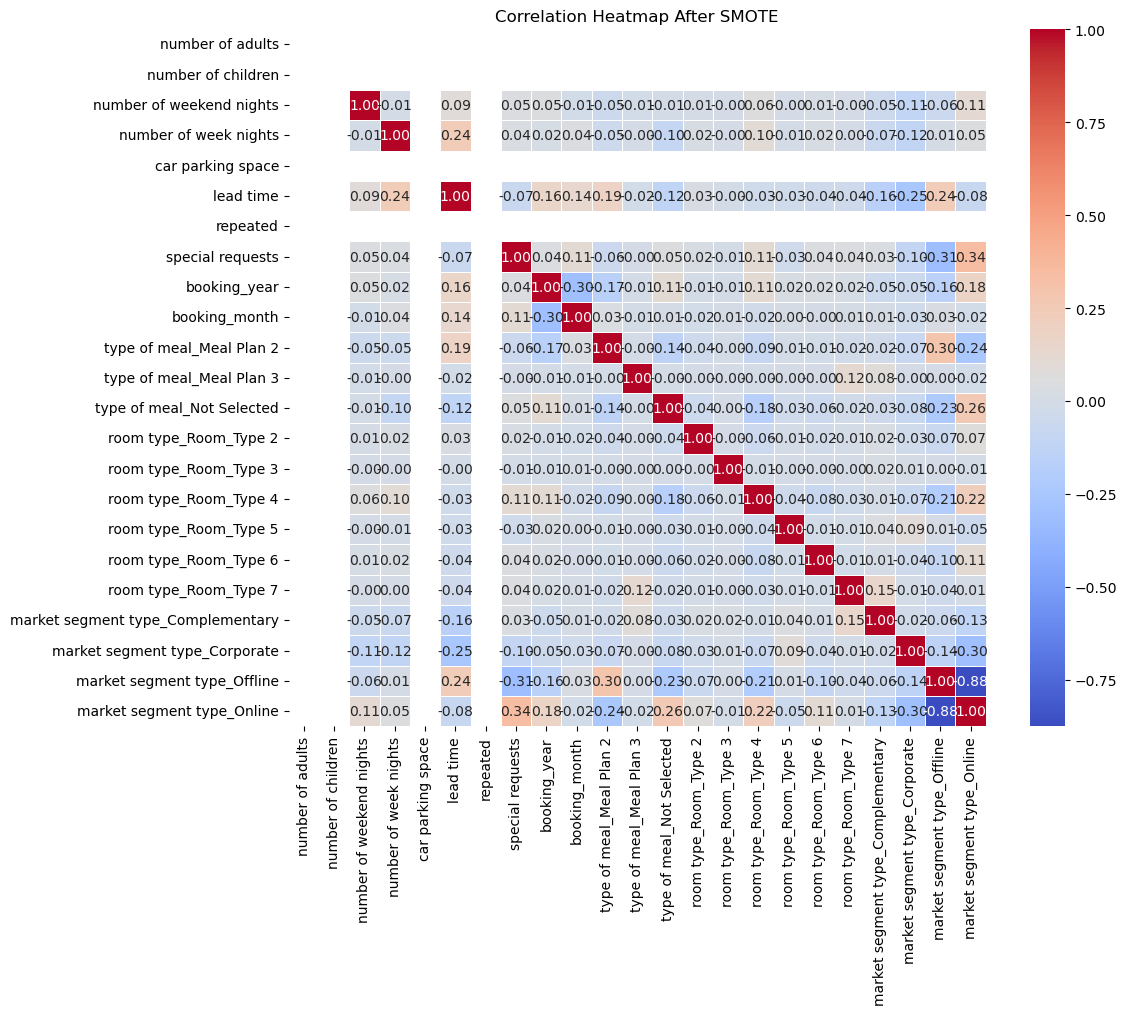

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_res_df = pd.DataFrame(X_train_res, columns=X_train.columns)

corr_matrix = X_res_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap After SMOTE")
plt.tight_layout()
plt.show()


In [53]:
# Logistic Regression
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      2377
           1       0.88      0.75      0.81      4873

    accuracy                           0.76      7250
   macro avg       0.74      0.77      0.74      7250
weighted avg       0.79      0.76      0.77      7250

Confusion Matrix:
 [[1859  518]
 [1219 3654]]
Accuracy: 0.7604137931034483


In [54]:
# Polynomial Regression (classification via regression)
# ===============================
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_res)
X_test_poly = poly.transform(X_test_scaled)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train_res)
y_pred_poly = linreg_poly.predict(X_test_poly)
y_pred_poly_rounded = np.round(y_pred_poly).astype(int)

print("\nPolynomial Regression")
print(classification_report(y_test, y_pred_poly_rounded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly_rounded))
print("Accuracy:", accuracy_score(y_test, y_pred_poly_rounded))

print("Predicted class distribution:", np.unique(y_pred_poly_rounded, return_counts=True))
print("True class distribution:", np.unique(y_test, return_counts=True))



Polynomial Regression
              precision    recall  f1-score   support

 -2147483648       0.00      0.00      0.00         0
           0       0.64      0.77      0.70      2377
           1       0.88      0.78      0.83      4873
           2       0.00      0.00      0.00         0

    accuracy                           0.78      7250
   macro avg       0.38      0.39      0.38      7250
weighted avg       0.80      0.78      0.79      7250

Confusion Matrix:
 [[   0    0    0    0]
 [   1 1842  534    0]
 [   1 1055 3815    2]
 [   0    0    0    0]]
Accuracy: 0.7802758620689655
Predicted class distribution: (array([-2147483648,           0,           1,           2]), array([   2, 2897, 4349,    2], dtype=int64))
True class distribution: (array([0, 1]), array([2377, 4873], dtype=int64))


C:\Users\Firas\AppData\Local\Temp\ipykernel_9716\3839346716.py:14: RuntimeWarning: invalid value encountered in cast
  y_pred_poly_rounded = np.round(y_pred_poly).astype(int)
C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division

In [55]:
# Linear Regression (baseline)
# ===============================
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_res, y_train_res)
y_pred_linreg = linreg.predict(X_test_scaled)
y_pred_linreg_rounded = np.round(y_pred_linreg).astype(int)

print("\nLinear Regression")
print(classification_report(y_test, y_pred_linreg_rounded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linreg_rounded))
print("Accuracy:", accuracy_score(y_test, y_pred_linreg_rounded))


Linear Regression
              precision    recall  f1-score   support

           0       0.59      0.80      0.68      2377
           1       0.88      0.73      0.80      4873
           2       0.00      0.00      0.00         0

    accuracy                           0.75      7250
   macro avg       0.49      0.51      0.49      7250
weighted avg       0.79      0.75      0.76      7250

Confusion Matrix:
 [[1897  480    0]
 [1323 3542    8]
 [   0    0    0]]
Accuracy: 0.7502068965517241


C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Firas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
